# Group Project - Risk Based Segmentation 



## Introduction

Customer segmentation involves categorizing the portfolio by industry, location, revenue, account size, and number of employees and many other variables to reveal where risk and opportunity live within the portfolio. Those patterns can then provide key measurable data points for more predictive credit risk management. Taking a portfolio approach to risk management gives credit professionals a better fix on the accounts, in order to develop strategies for better serving segments that present the best opportunities. Not only that, you can work to maximize performance
in all customer segments, even seemingly risky segments.

Customer segmentation analysis can lead to several tangible improvements in credit risk management: stronger credit policies, and improved internal communication and cooperation across teams.


In [ ]:
#!pip install --upgrade git+http://github.com/renero/dataset
#!pip install skrebate
#!pip install gplearn

In [1]:
import pandas as pd
import RiskDataframe as rdf
dataframe = pd.read_csv("AUTO_LOANS_DATA.csv", sep=";")


pivot_value = 'ACCOUNT_NUMBER'
target_value = 'BUCKET'
down_payment = 'PROGRAM_NAME'
income_status = 'PROFESSION'
birth_date = 'BIRTH_DATE'
dates_todays = ['REPORTING_DATE','LOAN_OPEN_DATE','EXPECTED_CLOSE_DATE','CUSTOMER_OPEN_DATE']


myrdf = rdf.RiskDataframe(dataframe)
df = myrdf.start(pivot_value,birth_date,target_value, down_payment,income_status,dates_todays)


df


,ACCOUNT_NUMBER,CUSTOMER_ID,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,BIRTH_DATE,PROFESSION,CAR_TYPE,DOWN_PAYMENT,TYPE,REPORTING_DATE_DAYS_LAPSED,LOAN_OPEN_DATE_DAYS_LAPSED,EXPECTED_CLOSE_DATE_DAYS_LAPSED,CUSTOMER_OPEN_DATE_DAYS_LAPSED
143,144,144,140500.0,0.00,0,M,39,ACTIVE,UNKNOWN,0.5,EMPLOYED,2044,2272,1555,3036
247,248,248,70000.0,0.00,1,F,37,ACTIVE,UNKNOWN,0.5,EMPLOYED,2044,3568,1737,3581
308,309,307,65500.0,0.00,0,M,44,ACTIVE,UNKNOWN,0.5,EMPLOYED,2044,3274,1463,3280
350,351,349,44500.0,0.00,1,M,40,ACTIVE,UNKNOWN,0.5,EMPLOYED,2044,2617,1160,2622
465,466,12,93000.0,0.00,0,UNKNOWN,UNKNOWN,ACTIVE,UNKNOWN,0.0,CORPORATE,2044,3478,2047,7611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,36547,35528,90000.0,78956.52,0,M,27,ACTIVE,GELORY,0.5,EMPLOYED,738,1074,-728,1085
900856,39597,38396,92500.0,92826.06,0,F,44,ACTIVE,GELORY,0.5,EMPLOYED,738,739,-1094,752
900857,38016,36905,140250.0,114919.47,0,M,41,ACTIVE,NISSAN,0.0,CORPORATE,738,899,186,950
900858,38899,37739,105000.0,101714.25,0,M,35,ACTIVE,DFSK,0.0,CORPORATE,738,802,-1002,831


### Setting the types

Make sure you use it inside the methods if you need this information, if you already transformed the data update this part.

In [2]:
'''Setting the types
argument_dict = {'REPORTING_DATE':'datetime64[ns]','LOAN_OPEN_DATE':'datetime64[ns]',
                 'EXPECTED_CLOSE_DATE':'datetime64[ns]','CUSTOMER_OPEN_DATE':'datetime64[ns]',
                 'BIRTH_DATE':'datetime64[ns]','PROGRAM_NAME':'category','SEX':'category',
                'PROFESSION':'category','CAR_TYPE':'category'}
myrdf.SetAttributes(argument_dict)
myrdf.dtypes
'''

"Setting the types\nargument_dict = {'REPORTING_DATE':'datetime64[ns]','LOAN_OPEN_DATE':'datetime64[ns]',\n                 'EXPECTED_CLOSE_DATE':'datetime64[ns]','CUSTOMER_OPEN_DATE':'datetime64[ns]',\n                 'BIRTH_DATE':'datetime64[ns]','PROGRAM_NAME':'category','SEX':'category',\n                'PROFESSION':'category','CAR_TYPE':'category'}\nmyrdf.SetAttributes(argument_dict)\nmyrdf.dtypes\n"



## 1) Implement a method .missing_not_at_random() 


In [3]:
myrdf.missing_not_at_random(input_vars=[]) 
 
    
    


Missing Not At Random Repport (MNAR) - SEX, BIRTH_DATE, PROFESSION, CAR_TYPE variables seem Missing Not at Random, there for we recommend: 
 
 Thin File Segment Variables (all others variables free of MNAR issue): REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, BUCKET, CUSTOMER_OPEN_DATE 
 
 Full File Segment Variables: REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, BUCKET, SEX, CUSTOMER_OPEN_DATE, BIRTH_DATE, PROFESSION, CAR_TYPE


##	2) implement a method .find_segment_split(variable)
given one variable, implement a method to identify if the variable is a good segmentation splitter and if the variable is a good splitter,   
different segments of customers with different level of risk (the one explained in the second video)
* Scope: data cleanning and data preparation is out of the scope of the Class, note that .find_segment_split(VARIABLE) assumes the data is already clean free of missing values.
* Categorical: for the segmentation process of categorical variable, dummy transformation is not practical, it is recommended that categorical variables come pre-transformed into numerical by replacing the categories by the Probability of belonging to class 1.
* The following code only works for a single variable, implement a loop going over each variable of the dataset as a candidate for segmentation.
* The following method must implement two segmentation approaches, one for Categorical Nominal (order not relevant - variable must be automatically transformed) and others where order is important.



In [4]:
seg_data_cat =['SEX','PROFESSION','CAR_TYPE','TYPE']

In [5]:
myrdf.set_train_cat(target_value,seg_data_cat)

(['The total accuracy using all variable and Logistic regression is: 0.8775252525252525',
  'Using: SEX GINI Full Model Seg1: 43.92496392496392%',
  'Using: SEX GINI Segmented Model Seg1: 43.92496392496392%',
  'Using: SEX GINI Full Model Seg2: 32.81481481481481%',
  'Using: SEX GINI Segmented Model Seg2:32.81481481481481%',
  'Using: PROFESSION GINI Full Model Seg1: 38.93550707264444%',
  'Using: PROFESSION GINI Segmented Model Seg1: 38.93550707264444%',
  'Using: PROFESSION GINI Full Model Seg2: nan%',
  'Using: PROFESSION GINI Segmented Model Seg2:nan%',
  'Using: CAR_TYPE GINI Full Model Seg1: 46.788321167883204%',
  'Using: CAR_TYPE GINI Segmented Model Seg1: 46.788321167883204%',
  'Using: CAR_TYPE GINI Full Model Seg2: 37.6018246985989%',
  'Using: CAR_TYPE GINI Segmented Model Seg2:37.6018246985989%',
  'Using: TYPE GINI Full Model Seg1: 38.52255351681955%',
  'Using: TYPE GINI Segmented Model Seg1: 38.52255351681955%',
  'Using: TYPE GINI Full Model Seg2: 26.82926829268293%',


In [6]:
seg_data_num = ['ORIGINAL_BOOKED_AMOUNT','OUTSTANDING','BIRTH_DATE','DOWN_PAYMENT','REPORTING_DATE_DAYS_LAPSED','LOAN_OPEN_DATE_DAYS_LAPSED','EXPECTED_CLOSE_DATE_DAYS_LAPSED','CUSTOMER_OPEN_DATE_DAYS_LAPSED']

In [7]:
myrdf.encod(seg_data_cat)

,ACCOUNT_NUMBER,BIRTH_DATE,BUCKET,CAR_TYPE_AUDI,CAR_TYPE_BAIC,CAR_TYPE_BMW,CAR_TYPE_BRILLIANCE,CAR_TYPE_BYD,CAR_TYPE_CARRY,CAR_TYPE_CHANA,...,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,PROFESSION_ACTIVE,PROFESSION_UNEMPLOYED,REPORTING_DATE_DAYS_LAPSED,SEX_F,SEX_M,SEX_UNKNOWN,TYPE_CORPORATE,TYPE_EMPLOYED
143,144.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140500.0,0.00,1.0,0.0,2044.0,0.0,1.0,0.0,0.0,1.0
247,248.0,37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70000.0,0.00,1.0,0.0,2044.0,1.0,0.0,0.0,0.0,1.0
308,309.0,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,0.00,1.0,0.0,2044.0,0.0,1.0,0.0,0.0,1.0
350,351.0,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44500.0,0.00,1.0,0.0,2044.0,0.0,1.0,0.0,0.0,1.0
465,466.0,UNKNOWN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93000.0,0.00,1.0,0.0,2044.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,36547.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90000.0,78956.52,1.0,0.0,738.0,0.0,1.0,0.0,0.0,1.0
900856,39597.0,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,92500.0,92826.06,1.0,0.0,738.0,1.0,0.0,0.0,0.0,1.0
900857,38016.0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140250.0,114919.47,1.0,0.0,738.0,0.0,1.0,0.0,1.0,0.0
900858,38899.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,105000.0,101714.25,1.0,0.0,738.0,0.0,1.0,0.0,1.0,0.0


In [8]:
myrdf.set_train_num(seg_data_cat,target_value,seg_data_num)

(['The total accuracy using all variable and Logistic regression is: 0.8767471410419314',
  'Using: ORIGINAL_BOOKED_AMOUNT GINI Full Model Seg1: 31.295183346398424%',
  'Using: ORIGINAL_BOOKED_AMOUNT GINI Segmented Model Seg1: 31.295183346398424%',
  'Using: ORIGINAL_BOOKED_AMOUNT GINI Full Model Seg2: 43.49881796690307%',
  'Using: ORIGINAL_BOOKED_AMOUNT GINI Segmented Model Seg2: 43.49881796690307%',
  'Using: OUTSTANDING GINI Full Model Seg1: 49.69866551872579%',
  'Using: OUTSTANDING GINI Segmented Model Seg1: 49.69866551872579%',
  'Using: OUTSTANDING GINI Full Model Seg2: 42.373834779813556%',
  'Using: OUTSTANDING GINI Segmented Model Seg2: 42.373834779813556%',
  'Using: BIRTH_DATE GINI Full Model Seg1: 50.75315840621963%',
  'Using: BIRTH_DATE GINI Segmented Model Seg1: 50.75315840621963%',
  'Using: BIRTH_DATE GINI Full Model Seg2: 26.269945835163245%',
  'Using: BIRTH_DATE GINI Segmented Model Seg2: 26.269945835163245%',
  'Using: DOWN_PAYMENT GINI Full Model Seg1: 29.109195

       ACCOUNT_NUMBER        BUCKET  CAR_TYPE_AUDI  CAR_TYPE_BAIC  \
count    39319.000000  39319.000000   39319.000000   39319.000000   
mean     19806.861136      0.119306       0.000254       0.006028   
std      11426.164302      0.324153       0.015946       0.077404   
min          1.000000      0.000000       0.000000       0.000000   
25%       9917.500000      0.000000       0.000000       0.000000   
50%      19818.000000      0.000000       0.000000       0.000000   
75%      29681.500000      0.000000       0.000000       0.000000   
max      39597.000000      1.000000       1.000000       1.000000   

       CAR_TYPE_BMW  CAR_TYPE_BRILLIANCE  CAR_TYPE_BYD  CAR_TYPE_CARRY  \
count  39319.000000         39319.000000  39319.000000    39319.000000   
mean       0.003433             0.006638      0.037590        0.000229   
std        0.058496             0.081204      0.190205        0.015128   
min        0.000000             0.000000      0.000000        0.000000   
25%     

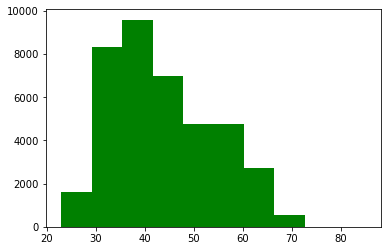

In [9]:
myrdf.plot_risk("BIRTH_DATE")

In [ ]:


'''myrdf.find_segment_split(canditate='SEX', # If the candidate variable is Nominal, in the class transform 
                                          # into probability of class 1 before performing the segmentation algorithm.
                         input_vars=['ORIGINAL_BOOKED_AMOUNT', 'OUTSTANDING'],  # List of input variables ready for 
                                                                                # Logistic Regression, dates and 
                                                                                # text must be transformed before 
                                                                                # invoking the method.   
                         target='BINARIZED_TARGET') # The target variable must be 0 or 1

'''

---

# LogisticRegression - Full Model - all variables

You sould use LogisticRegression in the modeling part to avoid any overfitting issues, and also split your data into train and test split.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
splitter = train_test_split
"-----------------------"

df_train, df_test = splitter(df, test_size = 0.2, random_state = 42)

In [ ]:
X_train = df_train[all_numeric_variables]
y_train = df_train[target]

In [ ]:
X_test = df_test[all_numeric_variables]
y_test = df_test[target]

In [ ]:
from sklearn.linear_model import LogisticRegression
method = LogisticRegression(random_state=0)
fitted_full_model = method.fit(X_train, y_train)
y_pred = fitted_full_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# GINI vs Accuracy - use GINI for this analysis!

GINI as well as accuracy is a 0 to 1 measure, 0 being very bad prediction and 1 being perfect separation.
For this project __you should use GINI__ as it looks the model in all predictions (all range of probabilities), accuracy gets the probability and using a cut-off and transform the probability into predicted class 0 for probabilities below 50% and predicted class 1 for above or equal to 50%. So using accuracy makes our analysis for segmentation very short sighted as the result of the analysis could change if one changes the cut-off to let say 40%, for this reason we will use the GINI coeficient which is independent of the cut-off having a better overview of the whole model predictions.

GINI is a simple calculation resulting from AUC. You will not find directly the Gini Coefficient as an attribute for the LogisticRegressor Class, but you can use the 2*AUC-1 formula to calculate it. 

If you want more details about GINI have a look into this video:
https://www.youtube.com/watch?v=MiBUBVUC8kE


Make sure you use .predict_proba (to predict probability) and then get the first column using [:,1] to get only the probability of being 1, instead of .predict which gives the 0 or 1 class. This proba is  what you need to pass as predictions_list below, to finally obtain the GINI:

# Execution Summary Repport

&emsp;
BUCKET is the target variable and was not analyzed separetly.

__Missing Not At Random Repport__ -  REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID variables seem Missing Not at Random, there for we recommend:

&emsp;  Thin File Segment Variables: PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, 
ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, SEX, 
CUSTOMER_OPEN_DATE, BIRTH_DATE, PROFESSION, CAR_TYPE

&emsp; Full File Segment Variables: REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, 
OUTSTANDING, SEX, CUSTOMER_OPEN_DATE, BIRTH_DATE, PROFESSION, CAR_TYPE

__Variable by Variable Risk Based Segmentation Analysis__:

&emsp; REPORTING_DATE Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; ACCOUNT_NUMBER Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; CUSTOMER_ID Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; PROGRAM_NAME Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; LOAN_OPEN_DATE Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; EXPECTED_CLOSE_DATE Good for segmentation.  

&emsp; &emsp; Segment1: EXPECTED_CLOSE_DATE < '22/07/2021'  [GINI Full Model: 32.1234% / GINI Segmented Model: 33.4342%]

&emsp; &emsp;  Segment2: EXPECTED_CLOSE_DATE >= '22/07/2021' [GINI Full Model: 63.7523% / GINI Segmented Model: 68.8342%]

&emsp; ORIGINAL_BOOKED_AMOUNT Good for segmentation.  

&emsp; &emsp; Segment1: ORIGINAL_BOOKED_AMOUNT < 90000 [GINI Full Model: 32.3243% / GINI Segmented Model: 33.9833%]

&emsp; &emsp; Segment2: ORIGINAL_BOOKED_AMOUNT >= 90000 [GINI Full Model: 63.3449% / GINI Segmented Model: 68.9438%]

&emsp; OUTSTANDING Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; SEX Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; CUSTOMER_OPEN_DATE Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; CUSTOMER_OPEN_DATE Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; BIRTH_DATE Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; PROFESSION Not good for segmentation. Afer analysis, we did not find a good split using this variable.

&emsp; CAR_TYPE Good for segmentation.  

&emsp; &emsp; Segment1: CAR_TYPE in (BMW', 'BYD', 'CARRY', 'Changan', 'CHEVROLET', 'Gelory', 'GELY', 'HYUNDAI') [GINI Full Model: 35.3492% / GINI Segmented Model: 37.3943%]

&emsp; &emsp; Segment2: CAR_TYPE in ('Jack', 'KIA', 'MERCEDES', 'MITSUBISHI', 'NISSAN', 'RENAULT', 'SEAT', 'SKODA', 'SUZUKI') [GINI Full Model: 42.4324% / GINI Segmented Model: 49.4393%]